<a href="https://colab.research.google.com/github/beggy22/cluster/blob/main/Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Solo nos quedamos con éstas 3 variables

X = data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
#Dividir conjunto de datos en test y entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


Metodos de decision para elegir numero de cluster

Gráfico de sedimentación

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

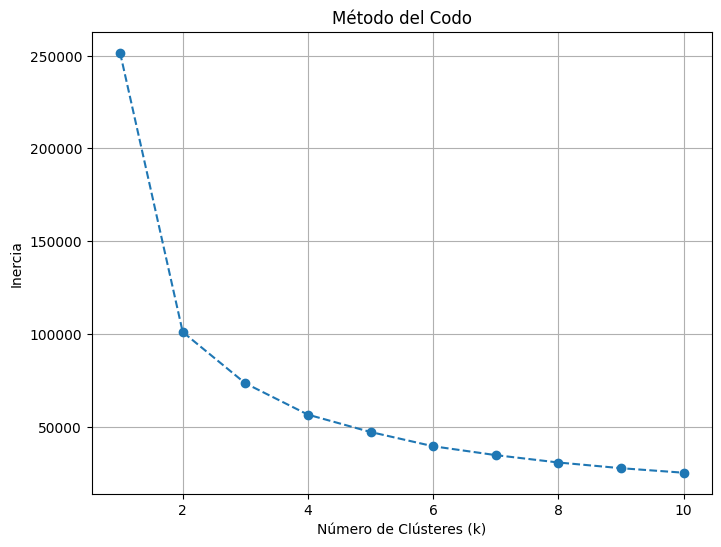

In [7]:
# Inicializar una lista para almacenar las inercias
inertias = []

# Probar diferentes valores de k
for k in range(1, 11):
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Calcular la inercia y añadirla a la lista
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

Deberia eligir entre 4 y 6 cluster porque es el punto donde la inercia disminuye.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

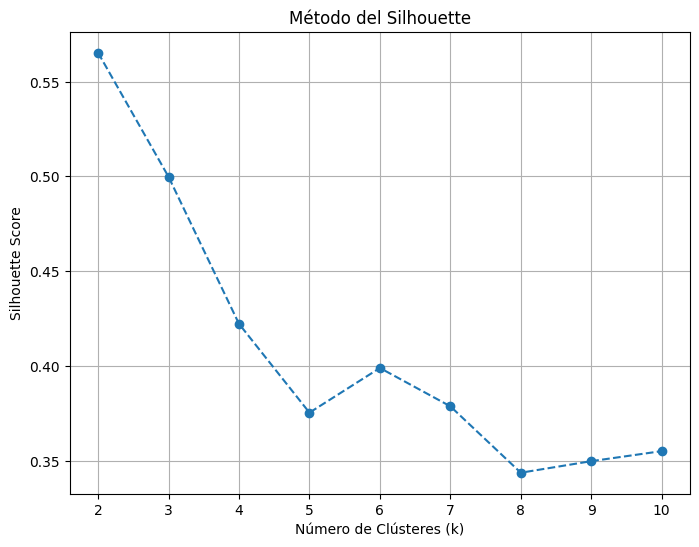

In [8]:
def calculate_silhouette(data, max_k):
    silhouette_avg = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    return silhouette_avg

# Calculamos el puntaje de silueta para un rango de clusters
silhouette_avg = calculate_silhouette(X_train, 10)

# Graficar el puntaje de silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_avg, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método del Silhouette')
plt.grid(True)
plt.show()


El valor máximo está en k=6, así que éste método sugiere esa elección

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

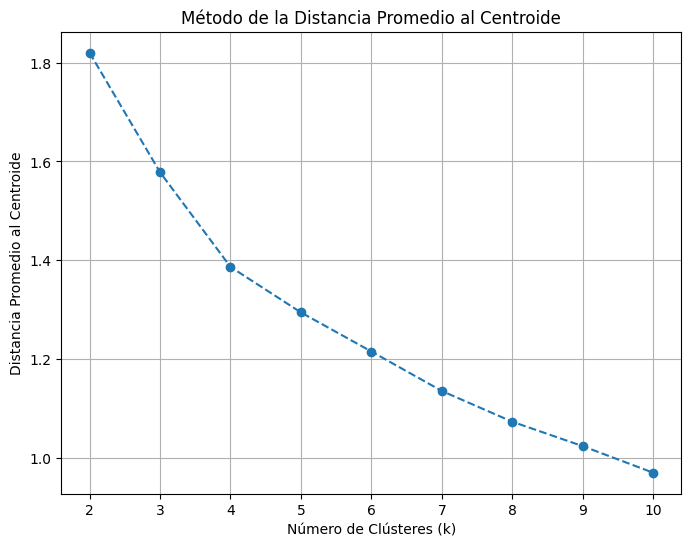

In [9]:
def calculate_average_distance_to_centroid(data, max_k):
    avg_distances = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distances = kmeans.transform(data)
        avg_distance = distances.min(axis=1).mean()
        avg_distances.append(avg_distance)
    return avg_distances

# Calculamos la distancia promedio al centroide para un rango de clusters
avg_distances = calculate_average_distance_to_centroid(X_train, 10)

# Graficar la distancia promedio al centroide
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), avg_distances, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Distancia Promedio al Centroide')
plt.title('Método de la Distancia Promedio al Centroide')
plt.grid(True)
plt.show()


No hay un codo claro en el gráfico, pero el descenso es más pronunciado entre
k=2 y k=6, luego se estabiliza.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

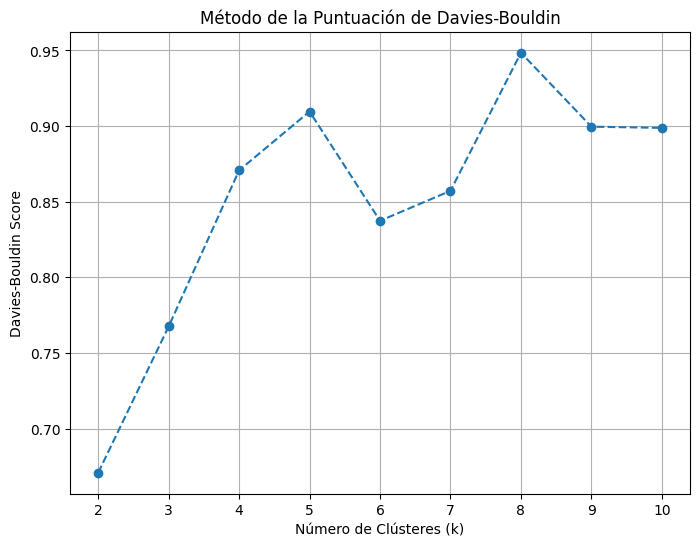

In [10]:
def calculate_davies_bouldin(data, max_k):
    db_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        db_scores.append(davies_bouldin_score(data, cluster_labels))
    return db_scores

# Calculamos la puntuación de Davies-Bouldin para un rango de clusters
db_scores = calculate_davies_bouldin(X_train, 10)

# Graficar la puntuación de Davies-Bouldin
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Método de la Puntuación de Davies-Bouldin')
plt.grid(True)
plt.show()


Con este método el punto más bajo sería el idóneo, es decir, 6 clúster

In [11]:
from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [12]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,4
8267,3.8125,33.77,-118.16,3
17445,4.1563,34.66,-120.48,3
14265,1.9425,32.69,-117.11,4
2271,3.5542,36.78,-119.80,1


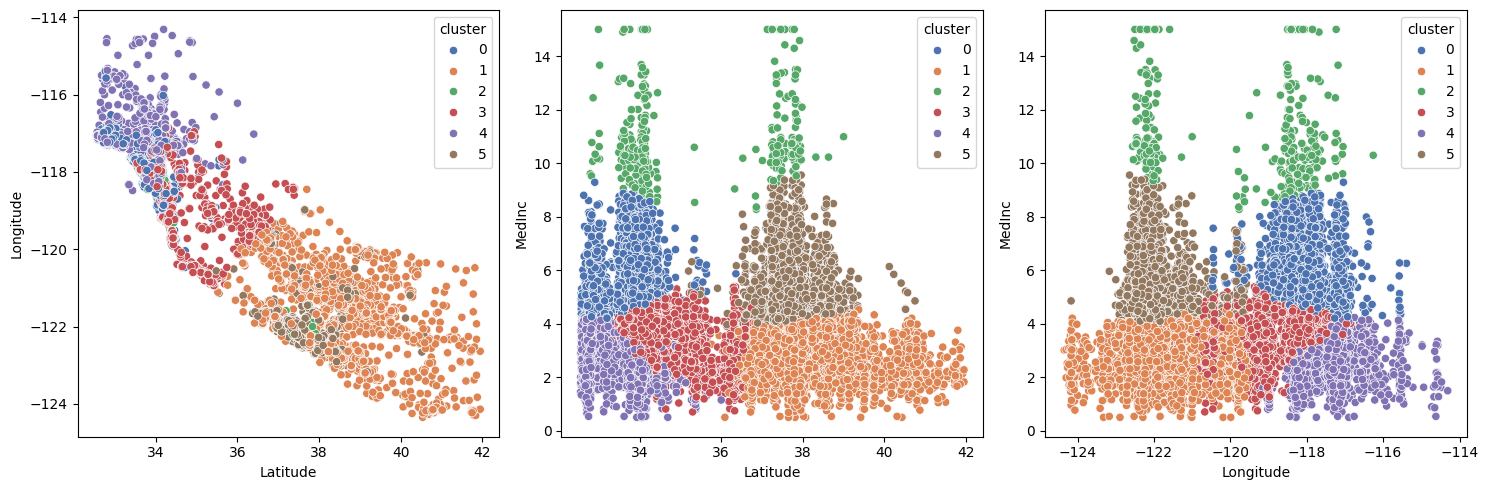

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

En las dos ultimas imagenes se aprecian claramente diferenciados los 6 cluster

In [16]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

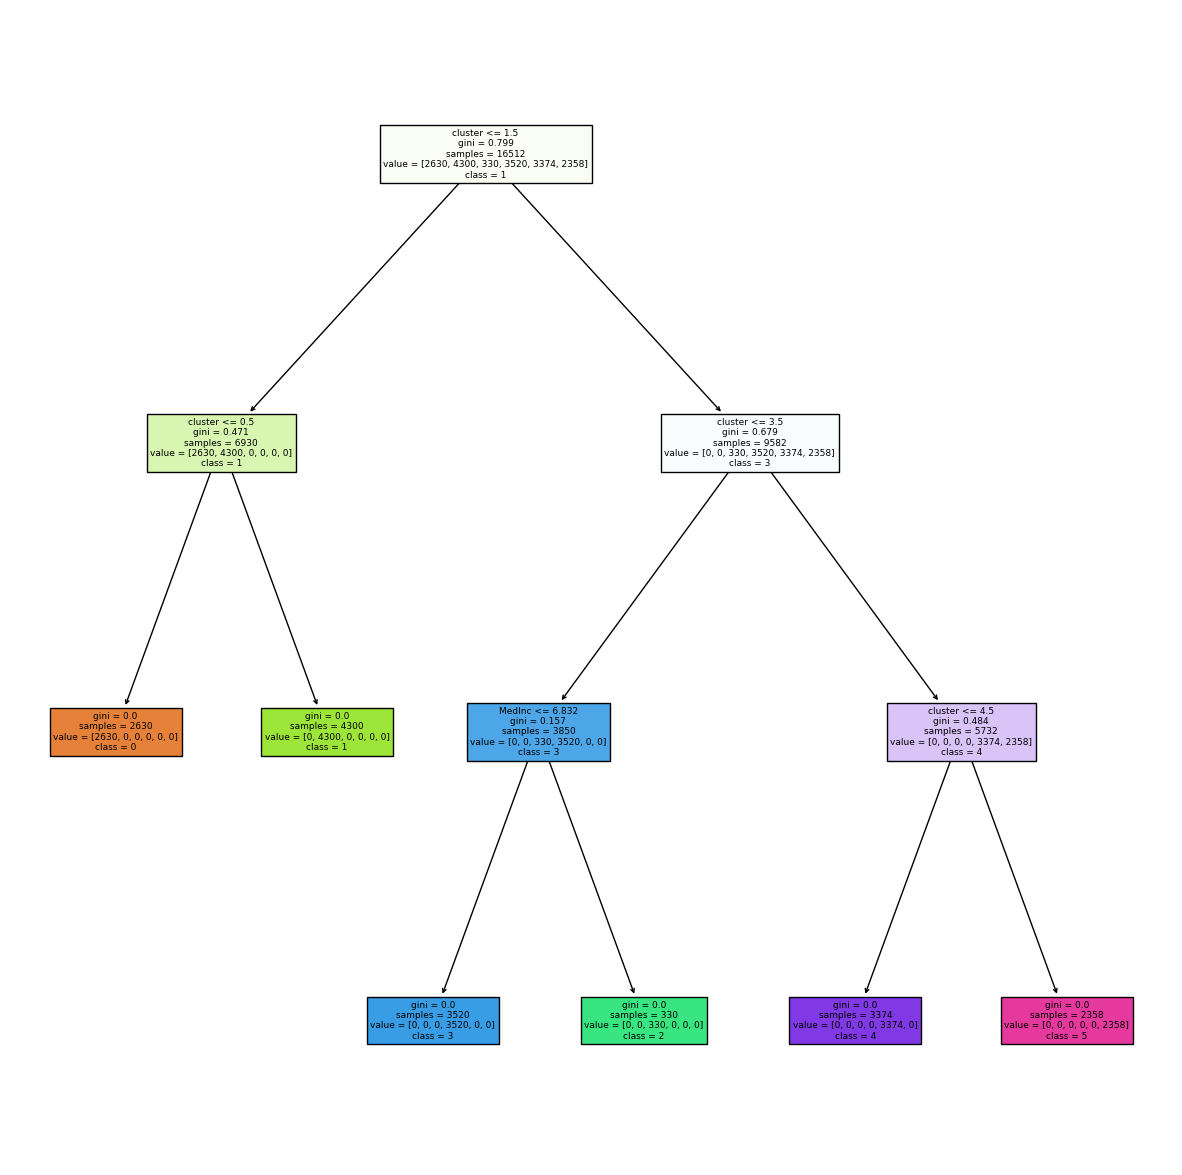

In [17]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [19]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,1
20484,5.7376,34.28,-118.72,0
9814,3.7250,36.62,-121.93,1


In [20]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 1, ..., 2, 1, 3], dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Cluster jerarquico

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular la matriz de similitud entre clusters
Z = linkage(X, method = "complete")

# Mostrar el dendrograma
plt.figure(figsize = (10, 6))

dendrogram(Z)

plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()



Hay una caída notable alrededor de la distancia de 10.
Cortando el dendrograma a esta altura (10), se obtienen 3 clusters principales (naranja, verde y rojo).

Parece que una buena elección podría ser entre 3 y 5 clusters.



El metodo utilizado es Complete Linkage (Enlace Completo): También conocido como método de enlace máximo, calcula la distancia entre dos clusters como la máxima distancia posible entre cualquier par de puntos, uno de cada cluster. Este método tiende a producir clusters más compactos y esféricos.

Otros métodos de enlace incluyen:

Single Linkage (Enlace Simple): La distancia entre dos clusters es la mínima distancia entre cualquier par de puntos.

Average Linkage (Enlace Promedio): La distancia entre dos clusters es el promedio de todas las distancias entre pares de puntos.

Ward's Linkage: Minimiza la suma de las varianzas dentro de cada cluster.

Personalmente considero muy idóneo el método de Ward por la claridad en los datos



*   Metodo de Ward



In [ ]:
# Generar la matriz de enlace usando el método de Ward
Z_ward = linkage(X, method='ward')

# Visualizar el dendrograma para el método de Ward
plt.figure(figsize=(10, 6))
dendrogram(Z_ward)
plt.title("Dendrograma - Método de Ward")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()


Según el dendograma, sería razonable la eleccion de entre 3 y 5 cluster, resultado que ya obtuvimos con el metodo anterior.

In [ ]:
from pickle import dump

dump(model_no_sup, open("no_supervisado.sav", "wb"))
dump(model_no_sup, open("no_supervisado.sav", "wb"))